In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV 
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
# ROOT = r'/kaggle/input/ames-housing-dataset/AmesHousing.csv'
ROOT = r'/Users/harikesh/Desktop/ClassicalMachineLearning-ISL/AmesHousePrediction/AmesHousing.csv'

In [21]:
df = pd.read_csv(ROOT)
instances,features = df.shape
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## For the baseline inference and predictions, considering only the numerical value rows with null valued columns removed

In [75]:
num_df = df.select_dtypes(include='number')
num_df = num_df.dropna(axis=1)
num_df.isnull().sum().sum(),num_df.shape

(np.int64(0), (2930, 28))

In [80]:
num_df.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,31770,6,5,1960,1960,1656,0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,11622,5,6,1961,1961,896,0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,14267,6,6,1958,1958,1329,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,11160,7,5,1968,1968,2110,0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,13830,5,5,1997,1998,928,701,...,212,34,0,0,0,0,0,3,2010,189900


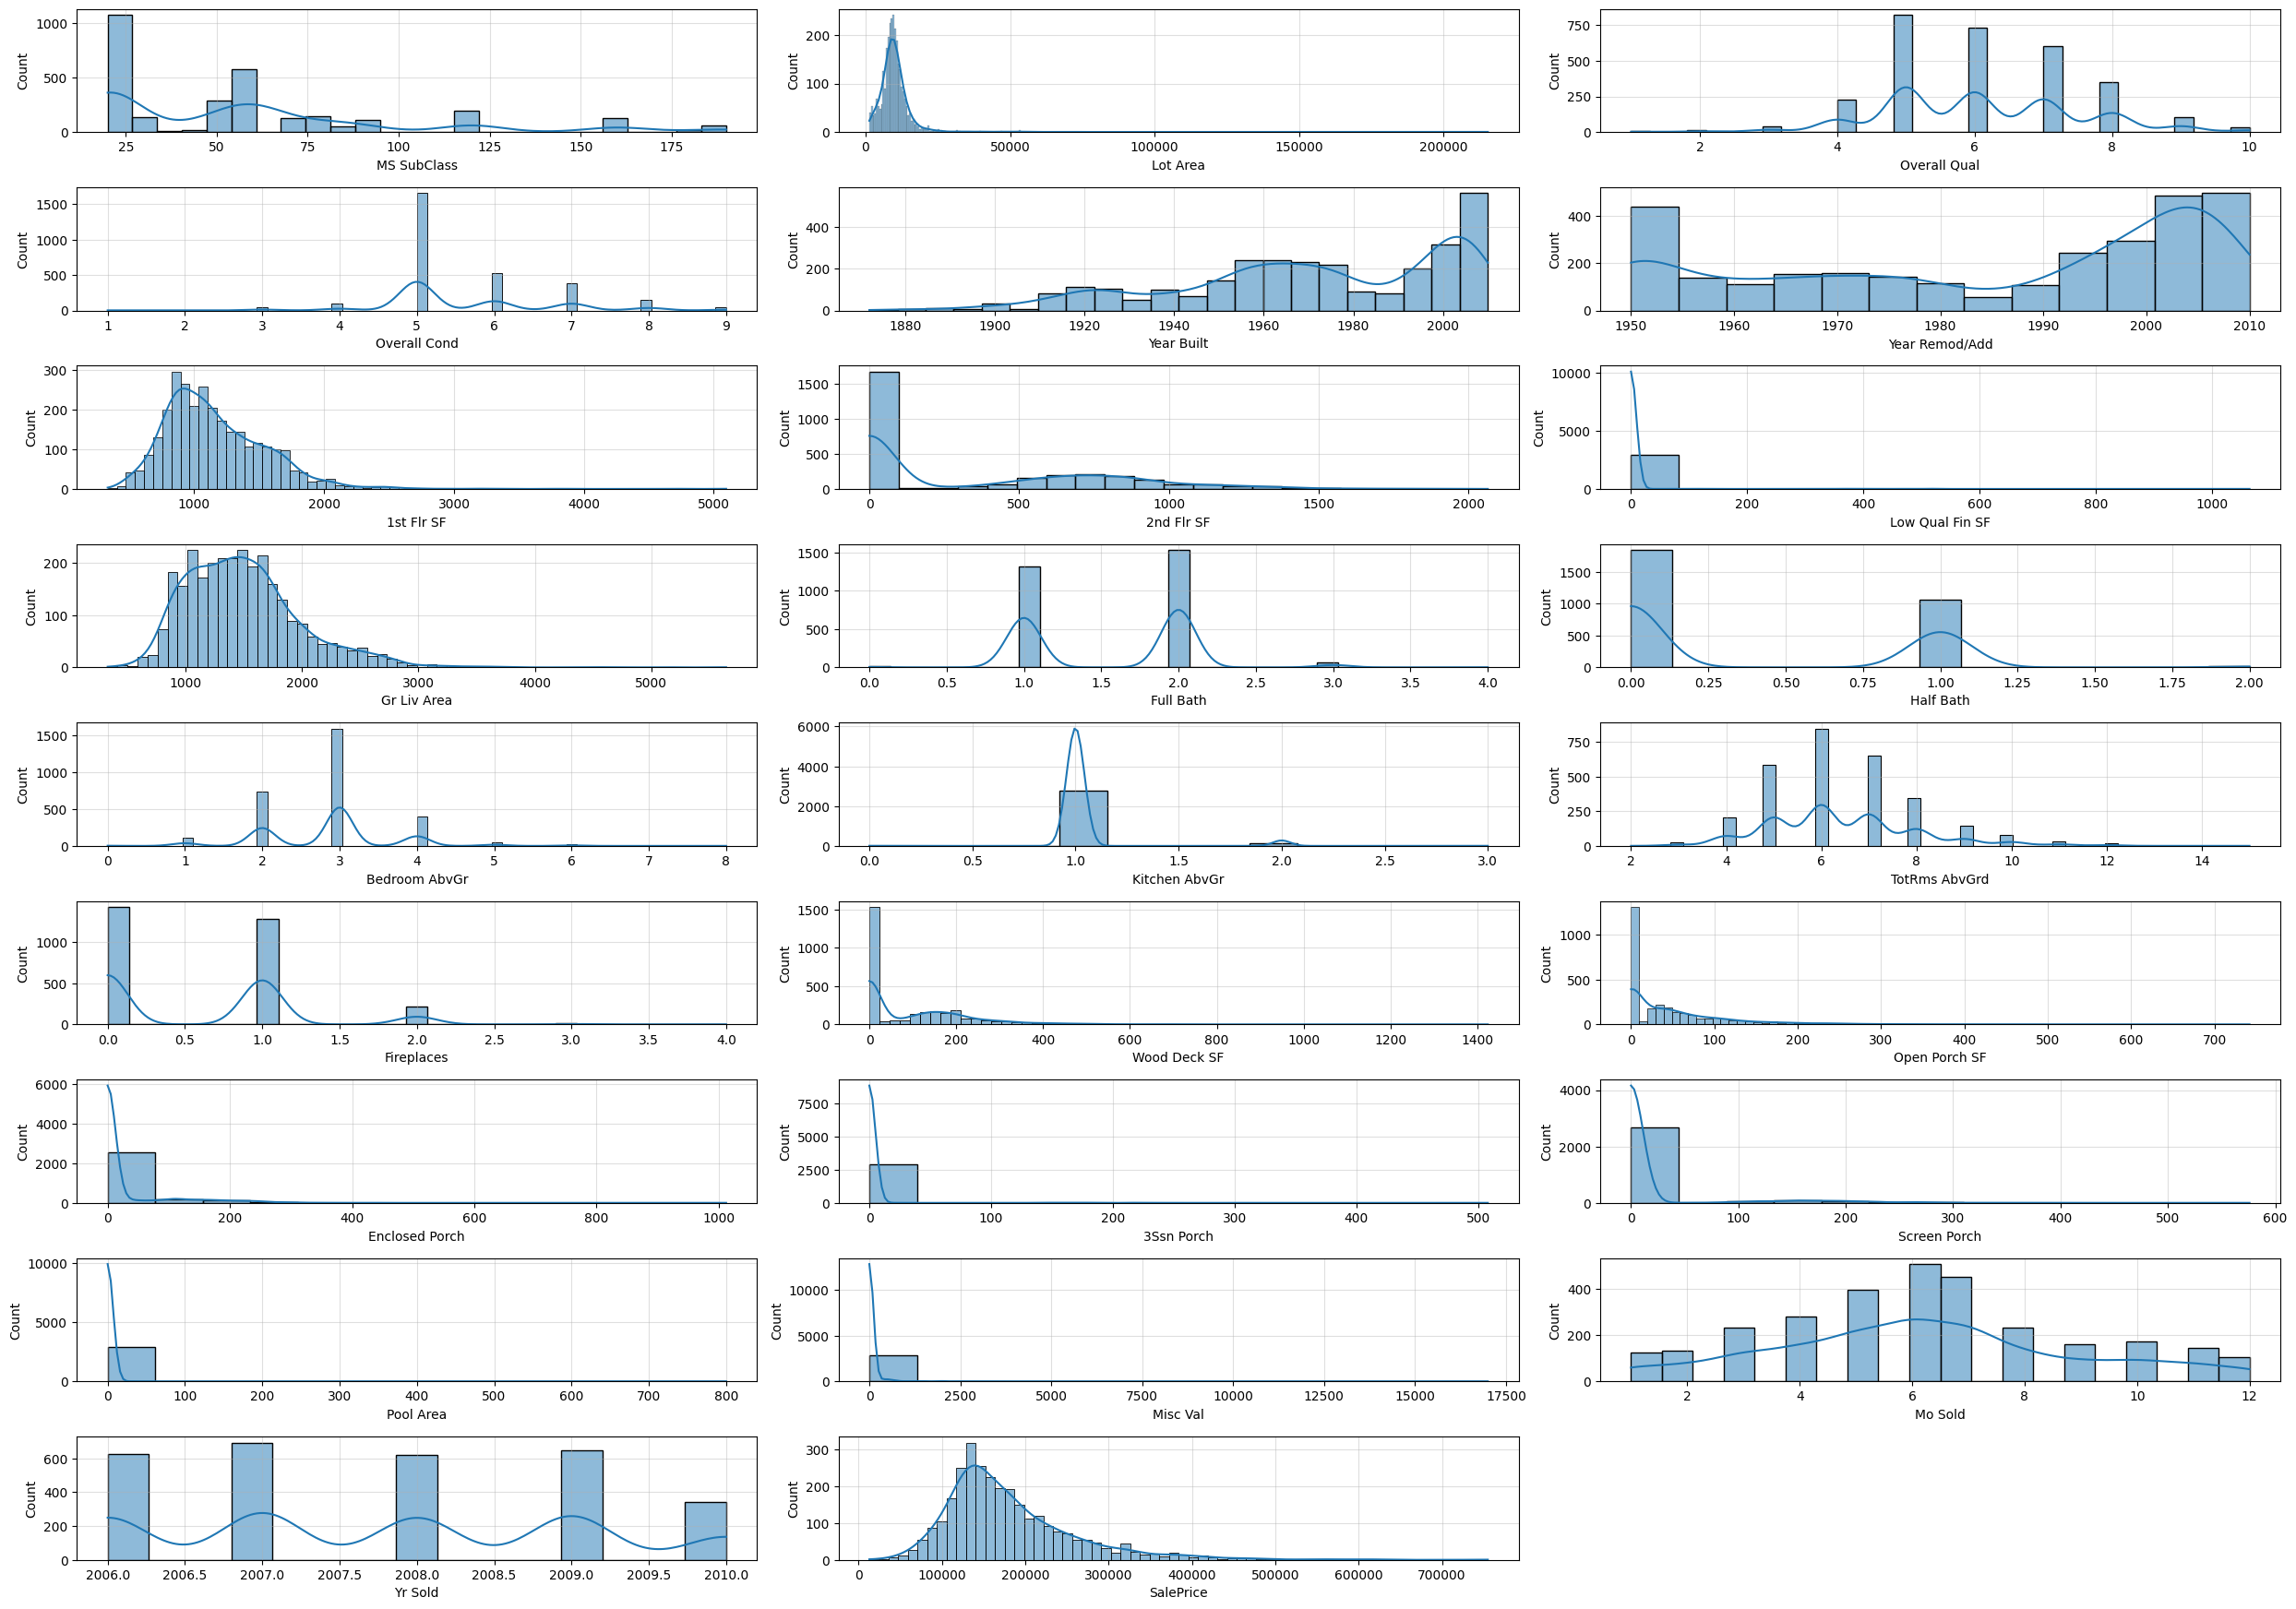

In [95]:
plt.figure(figsize=(25,50))
for idx,features in enumerate(num_df.columns):
    plt.subplot(len(num_df.columns),3,idx+1)
    sns.histplot(num_df[features],kde=True)
    plt.xlabel(features)
    plt.grid(alpha=0.4)
plt.tight_layout()

In [92]:
num_df = num_df.drop(columns=['Order','PID'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(num_df.drop(columns=['SalePrice','Order','PID']),num_df['SalePrice'],test_size=0.2,random_state=42)